# The analysis related to "Data Discovery using Conversational Agents"

Load data and libraries

In [1]:
import pandas as pd

path='path'

q_df=pd.read_csv(str(path)+'chat_stats.csv',encoding='utf-8')
p_df=pd.read_csv(str(path)+"participants_stats.csv", encoding='utf-8')


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

 
import matplotlib.pyplot as plt
import matplotlib.cm as cm


### Histograpms for categorical values

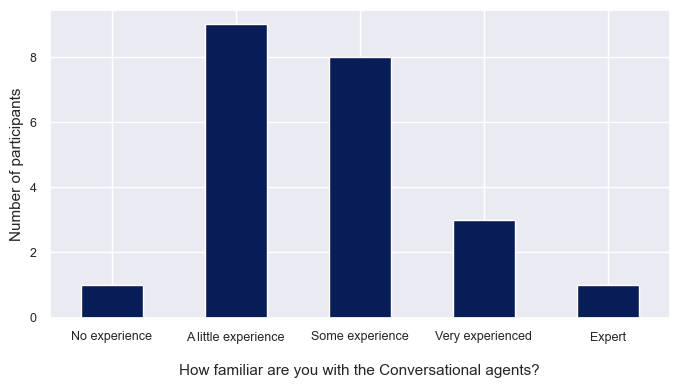

In [93]:
top_10 = p_df['familiar_with_agent'].value_counts().to_frame()

ser2 = top_10.reindex(index = ['No experience', 'A little experience', 'Some experience','Very experienced','Expert'])
ser2.plot(kind='bar',figsize=(8,4), color=cm.YlGnBu(1.),legend=False)
sns.set(style="darkgrid")
plt.ylabel('Number of participants', fontsize=11)
plt.xlabel('How familiar are you with the Conversational agents?',fontsize=11,labelpad=15)
plt.xticks(fontsize=9,rotation='horizontal')
plt.yticks(fontsize=9)

plt.savefig('/familiar.png', bbox_inches='tight',dpi=300)
# plt.title('All Time Medals of top 10 countries')

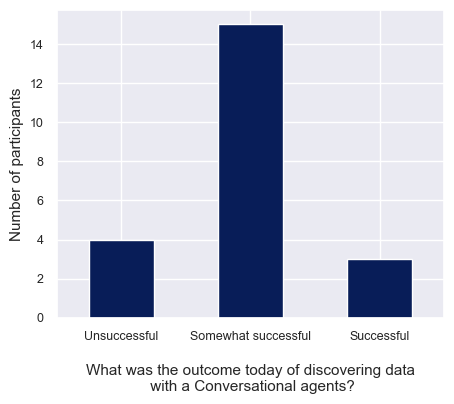

In [92]:
top_10 = p_df['success_of_session'].value_counts().to_frame()
ser2 = top_10.reindex(index = ['Unsuccessful', 'Somewhat successful', 'Successful'])

ser2.plot(kind='bar',figsize=(5,4), color=cm.YlGnBu(1.),legend=False)
sns.set(style="darkgrid")
plt.ylabel('Number of participants',fontsize=11)
plt.xlabel('What was the outcome today of discovering data\n with a Conversational agents?',fontsize=11,labelpad=15)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9,rotation='horizontal')

plt.savefig('/success.png', bbox_inches='tight',dpi=300)

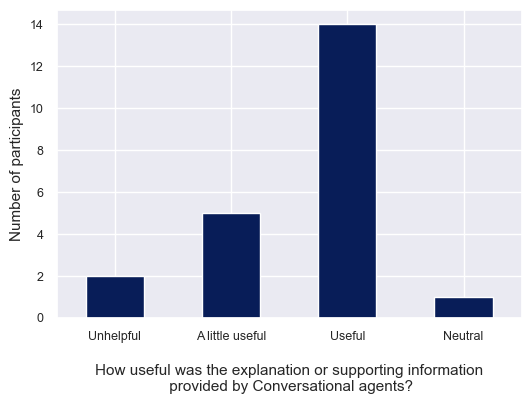

In [91]:
top_10 = p_df['useful'].value_counts().to_frame()
ser2 = top_10.reindex(index = ['Unhelpful', 'A little useful', 'Useful','Neutral'])

ser2.plot(kind='bar',figsize=(6,4), color=cm.YlGnBu(1.),legend=False)
sns.set(style="darkgrid")
plt.ylabel('Number of participants',fontsize=11)
plt.xlabel('How useful was the explanation or supporting information\n provided by Conversational agents?',fontsize=11,labelpad=15)
plt.yticks(fontsize=9)
plt.xticks(rotation='horizontal',fontsize=9)
plt.savefig('/useful.png',bbox_inches='tight',dpi=300)

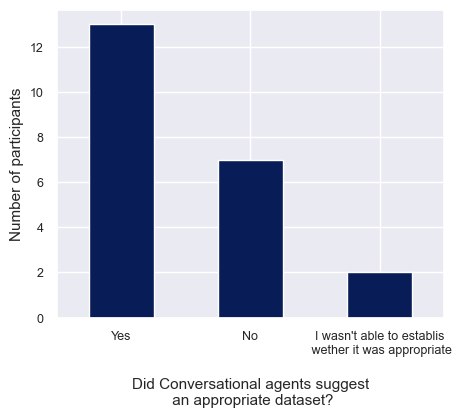

In [94]:


top_10 = p_df['appropriate_dataset'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(5,4), color=cm.YlGnBu(1.))
sns.set(style="darkgrid")
plt.ylabel('Number of participants',fontsize=11)
plt.xlabel('Did Conversational agents suggest\n an appropriate dataset?',fontsize=11,labelpad=15)
plt.yticks(fontsize=9)
x=['Yes','No',"I wasn't able to establis\n wether it was appropriate"]
plt.xticks(ticks=[0,1,2], labels=x,rotation='horizontal',fontsize=9)
plt.savefig('/results.png', bbox_inches='tight',dpi=300)

In [32]:
data = [
    "Freedom of Information Request;Personal recommendation;Google search;Data portal search;",
    "Freedom of Information Request;Personal recommendation;",
    "Google search;Data portal search;",
    "Data portal search;Google search;Freedom of Information Request;Personal recommendation;",
    "Freedom of Information Request;Personal recommendation;Google search;Data portal search;",
    "Google search;Personal recommendation;Other;",
    "Google search;Data portal search;Other;",
    "Have not previously searched for datasets;",
    "Google search;Other;",
    "Google search;",
    "Google search;Data portal search;Personal recommendation;",
    "Google search;Data portal search;Personal recommendation;",
    "Data portal search;Google search;",
    "Google search;Data portal search;",
    "Data portal search;Google search;Personal recommendation;",
    "Data portal search;Google search;",
    "Google search;Data portal search;Personal recommendation;",
    "Google search;",
    "Google search;Personal recommendation;",
    "Data portal search;Google search;Personal recommendation;Freedom of Information Request;Specific government and business websites;",
    "Data portal search;Google search;Personal recommendation;Freedom of Information Request;",
    "Data portal search;Personal recommendation;Google search;"
]



merged_list = [item for entry in [entry.split(';') for entry in data] for item in entry if item != '']
print(merged_list)

['Freedom of Information Request', 'Personal recommendation', 'Google search', 'Data portal search', 'Freedom of Information Request', 'Personal recommendation', 'Google search', 'Data portal search', 'Data portal search', 'Google search', 'Freedom of Information Request', 'Personal recommendation', 'Freedom of Information Request', 'Personal recommendation', 'Google search', 'Data portal search', 'Google search', 'Personal recommendation', 'Other', 'Google search', 'Data portal search', 'Other', 'Have not previously searched for datasets', 'Google search', 'Other', 'Google search', 'Google search', 'Data portal search', 'Personal recommendation', 'Google search', 'Data portal search', 'Personal recommendation', 'Data portal search', 'Google search', 'Google search', 'Data portal search', 'Data portal search', 'Google search', 'Personal recommendation', 'Data portal search', 'Google search', 'Google search', 'Data portal search', 'Personal recommendation', 'Google search', 'Google sear

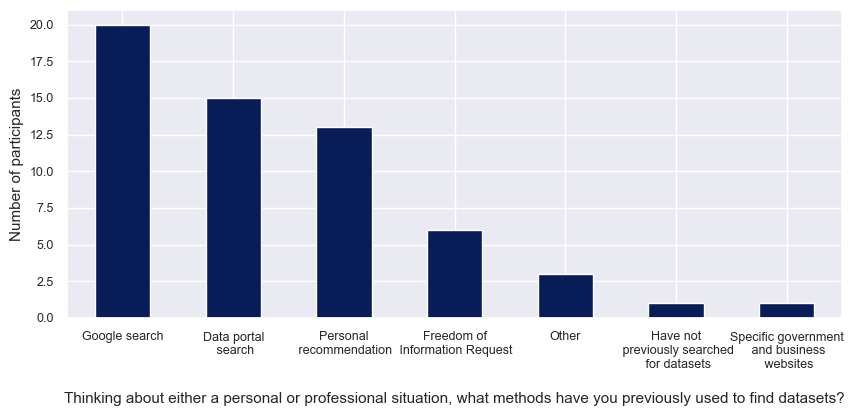

In [41]:
from collections import Counter
# frequency_count = Counter(merged_list)
frequency_count = Counter(merged_list)
dict=frequency_count.items()
top_10 = pd.DataFrame(dict)
top_10.columns=['category','count']
order = top_10.sort_values('count', ascending=False)
order.plot(kind='bar',figsize=(10,4), color=cm.YlGnBu(1.),legend=None)
sns.set(style="darkgrid")
plt.ylabel('Number of participants',fontsize=11)
plt.xlabel('Thinking about either a personal or professional situation, what methods have you previously used to find datasets?',fontsize=11,labelpad=15)
plt.yticks(fontsize=9)
x=['Google search','Data portal\n search','Personal\n recommendation','Freedom of\n Information Request','Other','Have not\n previously searched\n for datasets','Specific government\n and business\n websites']
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=x,rotation='horizontal',fontsize=9)
plt.savefig('/other_search.png', bbox_inches='tight',dpi=300)

## Plot for the number of words per query

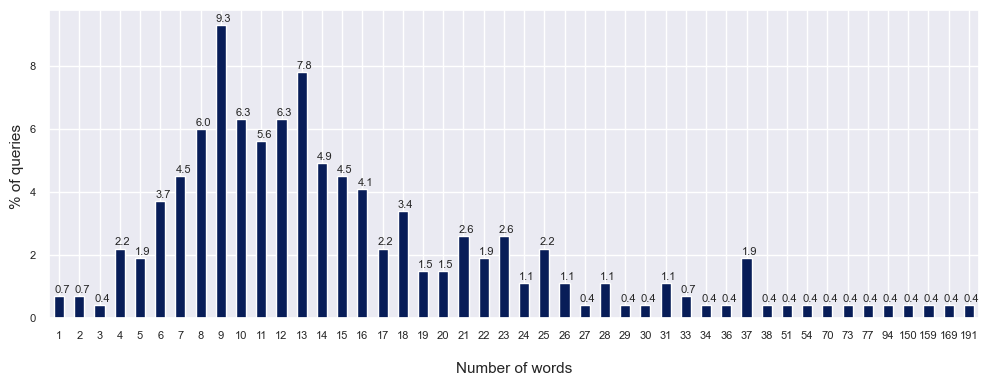

In [90]:
import pandas as pd 

num_words_q = q_df['num_words_question'].value_counts().to_frame()
ordered=num_words_q.sort_values('num_words_question')

#percentages
total = ordered['count'].sum()
# ordered['count_percentage'] = ordered['count'] / total * 100

perc=pd.DataFrame({'num_words_question':ordered.index,'percentege_count':ordered['count'] / total * 100})
perc.set_index('num_words_question', inplace=True)
perc=perc.round(1)

ax=perc.plot(kind='bar',figsize=(12,4), color=cm.YlGnBu(1.),legend=False)
sns.set(style="darkgrid")
plt.ylabel('% of queries ', fontsize=11)
plt.xlabel('Number of words',fontsize=11,labelpad=15)
plt.xticks(fontsize=8,rotation='horizontal')
plt.yticks(fontsize=8)

for p in ax.patches:
    ax.annotate(
        str(p.get_height()), xy=(p.get_x() , p.get_height() + 0.1), fontsize=8
    )

plt.savefig('/bar_word_question.png', bbox_inches='tight',dpi=300)


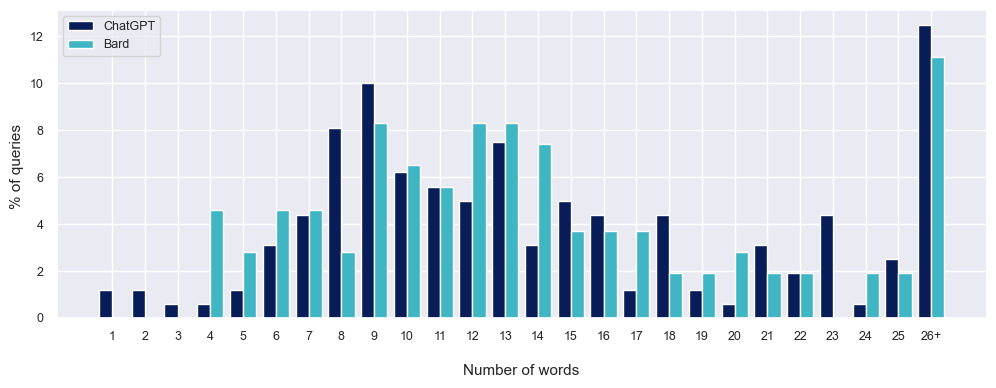

In [84]:
import pandas as pd 

df_B=pd.read_csv('/Users/elisavet/Desktop/MyAnalysis/ChatGPT_data_discovery/Statistics/freq_question_length_bard.csv',encoding='utf-8')
df_B.sort_values('values', inplace=True)

df_G=pd.read_csv('/Users/elisavet/Desktop/MyAnalysis/ChatGPT_data_discovery/Statistics/freq_question_length_gpt.csv',encoding='utf-8')
df_G.sort_values('values', inplace=True)


total_B = df_B['frequency'].sum()
total_G = df_G['frequency'].sum()


perc_B=pd.DataFrame({'values':df_B['values'],'percentege':df_B['frequency'] / total_B * 100})
perc_B=perc_B.round(1)

perc_G=pd.DataFrame({'values':df_G['values'],'percentege':df_G['frequency'] / total_G * 100})
perc_G=perc_G.round(1)

x=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26+']

X_axis = np.arange(len(x))
plt.figure(figsize=(12,4))
plt.bar(X_axis - 0.2, perc_G['percentege'], 0.4, label = 'ChatGPT',color=cm.YlGnBu(1.))
plt.bar(X_axis + 0.2, perc_B['percentege'], 0.4, label = 'Bard',color=cm.YlGnBu(0.5))

# df=pd.DataFrame({'values':x,'ChatGPT':perc_G['percentege'],'Bard':perc_B['percentege']})
# df.set_index('values', inplace=True)


# ax=df.plot(kind='bar',figsize=(8,4), color=cm.YlGnBu(1.))
# sns.set(style="darkgrid")

plt.ylabel('% of queries ', fontsize=11)

plt.xlabel('Number of words',fontsize=11,labelpad=15)
# x=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26+']
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],x,fontsize=9,rotation='horizontal')
plt.yticks(fontsize=9)
plt.legend(fontsize=9)


plt.savefig('/bar_word_question_agents.png', bbox_inches='tight',dpi=300)


### Boxplots for the classes and length of questiosn and answers during chat

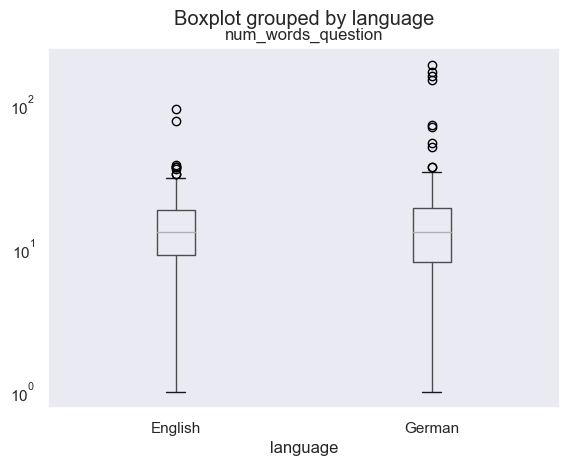

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

q_df.boxplot(by ='language', column =['num_words_question'], grid = False)
plt.yscale('log')
plt.savefig('/boxplot_question_laguage.png', bbox_inches='tight')

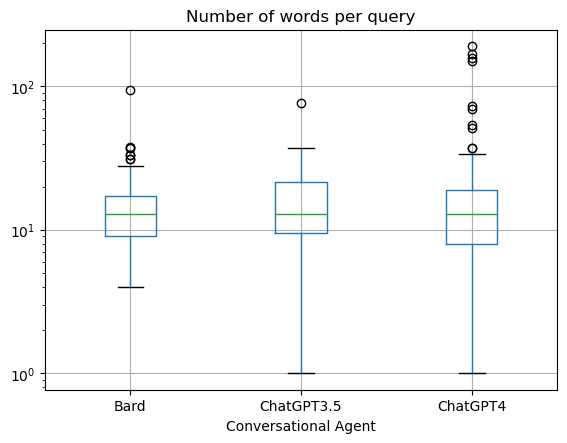

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

q_df.boxplot(by ='agent', column =['num_words_question'], grid = True)

plt.yscale('log')
plt.suptitle('')
plt.title('Number of words per query')
plt.xlabel('Conversational Agent')
plt.savefig('/boxplot_question_agent.png', bbox_inches='tight')

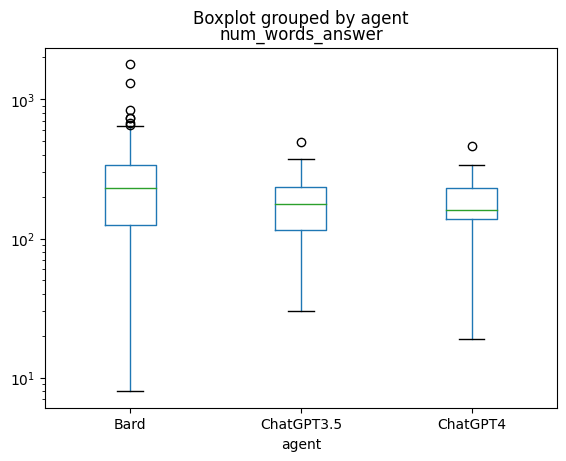

In [50]:
q_df.boxplot(by ='agent', column =['num_words_answer'], grid = False)
plt.yscale('log')
plt.savefig('/boxplot_answer_agent.png', bbox_inches='tight')

### Requests bar chart

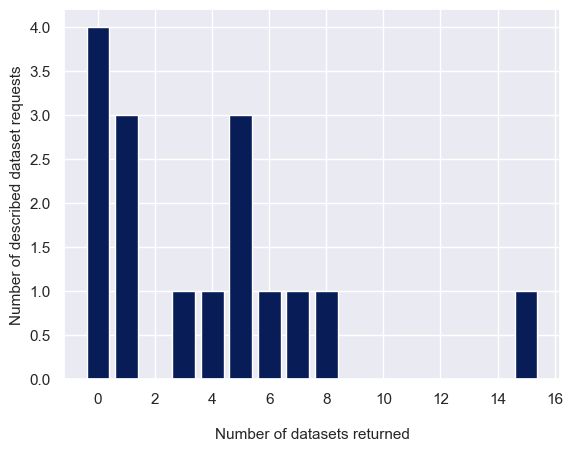

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 

y=[4,3,1,1,3,1,1,1,1]
x=[0,1,3,4,5,6,7,8,15]

B=pd.DataFrame({'x':x,'y':y})


# X_axis = np.arange(15)
# plt.figure(figsize=(12,4))


#ser2 = top_10.reindex(index = ['No experience', 'A little experience', 'Some experience','Very experienced','Expert'])
plt.bar(x,y,color=cm.YlGnBu(1.))
sns.set(style="darkgrid")
plt.ylabel('Number of described dataset requests', fontsize=11)
plt.xlabel('Number of datasets returned',fontsize=11,labelpad=15)
# plt.xticks(fontsize=9,rotation='horizontal')
# plt.yticks(fontsize=9)

plt.savefig('requests.png', bbox_inches='tight',dpi=300)
# plt.title('All Time Medals of top 10 countries')